### TASKS:
	Use this code as a guide for simple image analysis.
	
	1- Update the DFO code to find the brightest area in the input image.
	2- Try the code for other input images
	3- Change input image half-way through and see if your algorithm continues to perform

### ADVANCED TASKS:
	4- Is it possible to trace a moving object? 
	5- How about tracing gradually fading and emerging objects?
	6- What if the input image has two or more bright spots?
	7- If the task was to find symmetry in an image, what would be your fitness function?


#### Load libraries

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
from IPython import display
import time
import numpy as np

#### Load image and show image width and height

In [3]:
img = mpimg.imread('input1.png')

imgW = len(img[0])
imgH = len(img)

print('Image size:', imgW, 'x', imgH)

Image size: 500 x 500


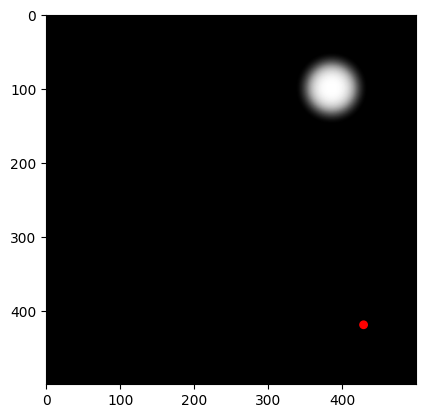

<Figure size 640x480 with 0 Axes>

In [4]:
plt.ion()
for i in range(50):
    imgplot = plt.imshow(img, cmap='gray') # SHOW IMAGE
    rowNo = random.randint(0,imgW) # PICK RANDOM ROW
    colNo = random.randint(0,imgH) # PICK RANDOM COLUMN
    swarmBestCircle = plt.Circle( (rowNo, colNo), 5, color='r') # DRAW A RED CIRCLE OF SIZE 5

    plt.gca().add_patch(swarmBestCircle)	# ADD THE CIRCLE
    plt.draw()	# DRAW THE IMAGE AND THE CIRCLE
    #plt.pause(0.0001) # PAUSE BEFORE THE NEXT ITERATION IN BETWEEN
    #plt.clf()	# CLEAR THE CANVAS 
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(.001)
    plt.clf()         # CLEAR THE CANVAS  


# Divide the image into gradient  Squares

# Setup Parameters

In [5]:
N = 500              # POPULATION SIZE
D = 2                # DIMENSIONALITY 
delta = 1            # DISTURBANCE THRESHOLD 
maxIterations = 1000 # ITERATIONS ALLOWED
lowerB = [-500]*D    # LOWER BOUND (IN ALL DIMENSIONS)
upperB = [ 500]*D    # UPPER BOUND (IN ALL DIMENSIONS)

# Create Flies

In [6]:
X = np.empty([N,D]) # EMPTY FLIES ARRAY OF SIZE: (N,D)
fitness = [None]*N  # EMPTY FITNESS ARRAY OF SIZE N

for i in range(N):
    for d in range(D):
        X[i,d] = np.random.randint(lowerB[d], upperB[d])
print(X)

[[-415.  -98.]
 [-153.   47.]
 [-261. -286.]
 [ -93. -131.]
 [ 355. -411.]
 [ -68.  487.]
 [-221.  173.]
 [ 139.    2.]
 [ 216.  -54.]
 [ 109.  439.]
 [ 488.  -71.]
 [-103.  -38.]
 [-445. -477.]
 [ 267.   -1.]
 [-378. -466.]
 [-125.  201.]
 [ 496. -483.]
 [  32.  465.]
 [-416. -462.]
 [ 163.  268.]
 [-173.  284.]
 [  30.  424.]
 [ 126.  375.]
 [-223. -414.]
 [-379.  391.]
 [ 180.  -86.]
 [-334.  339.]
 [-363.  153.]
 [ 174.  464.]
 [ 436. -425.]
 [ 240.  346.]
 [ 351.  310.]
 [-140.  460.]
 [ 222.   -8.]
 [ 349.  229.]
 [ 356.  328.]
 [-161. -223.]
 [  61.  406.]
 [ 378.   47.]
 [ 285.   97.]
 [ -91. -120.]
 [   2.    6.]
 [-250.    6.]
 [-329.  252.]
 [-464. -261.]
 [ 452. -399.]
 [ -31.  -14.]
 [ 448. -326.]
 [ 420.  285.]
 [-178.  -16.]
 [ 442. -464.]
 [-137. -134.]
 [-113.   -1.]
 [-313. -327.]
 [ 249.  134.]
 [ 114.  462.]
 [ -95.  107.]
 [ 460. -320.]
 [ 227.   84.]
 [-377.  374.]
 [-235.  246.]
 [-454.  -26.]
 [ 201. -241.]
 [-357. -185.]
 [ 257.  465.]
 [ 235.  349.]
 [  -2. -2

# Fintess Function

In [8]:
def f(fly):
    posx, posy = fly
    print(fly)
    return  -1 * img[int(posx)][int(posy)]

# Fly Training

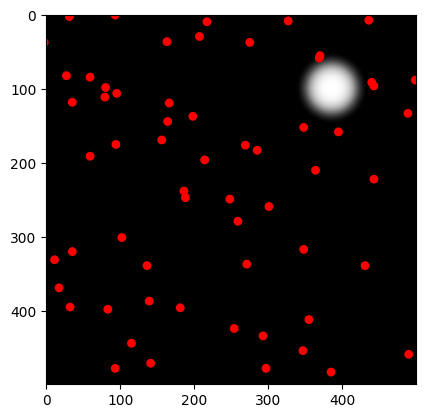

In [ ]:
for itr in range (maxIterations):
    for i in range(N): # EVALUATION
        fitness[i] = f(X[i,])
    s = np.argmin(fitness) # FIND BEST FLY

    if (itr%100 == 0): # PRINT BEST FLY EVERY 100 ITERATIONS
        print ("Iteration:", itr, "\tBest fly index:", s, 
               "\tFitness value:", fitness[s], f" position:{X[i][1]}{X[i][0]}")
        

    # TAKE EACH FLY INDIVIDUALLY 
    for i in range(N): 
        if i == s: continue # ELITIST STRATEGY

        # FIND BEST NEIGHBOUR
        left = (i-1)%N
        right = (i+1)%N
        bNeighbour = right if fitness[right]<fitness[left] else left

        for d in range(D): # UPDATE EACH DIMENSION SEPARATELY 
            if (np.random.rand() < delta):
                X[i,d] = int(np.random.uniform(lowerB[d], upperB[d]))
                continue;

            u = np.random.rand()
            X[i,d] = int(X[bNeighbour,d] + u*(X[s,d] - X[i,d]))

            # OUT OF BOUND CONTROL
            if X[i,d] < lowerB[d] or X[i,d] > upperB[d]:
                X[i,d] = int(np.random.uniform(lowerB[d], upperB[d]))
        plt.ion()
        imgplot = plt.imshow(img, cmap='gray') # SHOW IMAGE
        rowNo = X[i][1]
        colNo = X[i][0]
        swarmBestCircle = plt.Circle( (rowNo, colNo), 5, color='r') # DRAW A RED CIRCLE OF SIZE 5

        plt.gca().add_patch(swarmBestCircle)	# ADD THE CIRCLE
        plt.draw()	# DRAW THE IMAGE AND THE CIRCLE
        #plt.pause(0.0001) # PAUSE BEFORE THE NEXT ITERATION IN BETWEEN
        #plt.clf()	# CLEAR THE CANVAS 
        display.clear_output(wait=True)
        display.display(plt.gcf())
        time.sleep(.00001)
         
                
                